In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
config_datasheet_pre = r'./results/Pretest_Programmieraufgaben - Kopie (2).xlsx'
config_datasheet_post = r'./results/Posttest_Programmieraufgaben - Kopie.xlsx'

In [4]:
raw_pre = pd.read_excel(config_datasheet_pre)
raw_post = pd.read_excel(config_datasheet_post)
df_pre = pd.DataFrame(raw_pre)
df_post = pd.DataFrame(raw_post)

In [5]:
bar_df = pd.DataFrame([],columns=["Maximales Produkt", "String Wiederholung", "Postaufgaben"])

algo_names_pre = df_pre["Algorithmus"].unique()
tmp = df_post["Algorithmus"].unique()
algo_names_post = [tmp[1], tmp[0]]
unique_codes = df_post["Unique Code"].unique()
print(unique_codes)
count = len(unique_codes)

task1_errors = 0
task2_errors = 0
tasks_errors = 0

for code in unique_codes:
    task1_errors += float(df_post.loc[(df_post["Unique Code"] == code) & (df_post["Algorithmus"] == "Maximales Produkt")]["syntaktische Fehler"])
    task1_errors += float(df_post.loc[(df_post["Unique Code"] == code) & (df_post["Algorithmus"] == "Maximales Produkt")]["syntaktische Fehler"])

    task2_errors += float(df_post.loc[(df_post["Unique Code"] == code) & (df_post["Algorithmus"] == "String Wiederholung")]["Fehler"])
    tasks_errors = task1_errors + task2_errors

task1_errors /= count
task2_errors /= count
tasks_errors /= count

print(tasks_errors)

bar_df = bar_df.append(pd.DataFrame([[task1_errors, task2_errors, tasks_errors]], columns=["Maximales Produkt", "String Wiederholung", "Postaufgaben"]))

                       
#bar_df = bar_df.set_index('Algorithmus')
ax = bar_df.plot.bar(ylabel='Anzahl Fehler', rot=290, xlabel='test',title="Die durchschnittliche Fehleranzahl im Pre- und Posttest im Vergleich\n")
plt.tight_layout()
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/behavioral/bar_programming_tasks_post.pdf", bbox_inches='tight', pad_inches=0.01)


['1aMLsa' '1aTGsa' '1eASaa' '1nCWte' '1nUSüa' '2eTGer' '2nGAhe' '3rCHei'
 '4aRGür' '4iMVha' '4uCGer' '5nDFhi' '5nFKho' '5uHJei' '6aJGhh' '6aOGho'
 '6vEHhi' '8aRHui' '8lHHsu' '9aBWha' '9oMWun']


KeyError: 'Fehler'

STD 2487.8440389029133
STD 460.6023385586685
['Kürzestes Wort' 'Ungerade Anzahl']
P1 1.6315344807587615
P2 1.841324574993825
Pre 2.968886275067759
P3 0.6436503043467892
P4 0.9102589898327995
Post 1.1526367287968176
PRE 0.9047619047619048 2.380952380952381 3.2857142857142856
POST 0.2857142857142857 0.8571428571428571 1.1428571428571428
3.2857142857142856


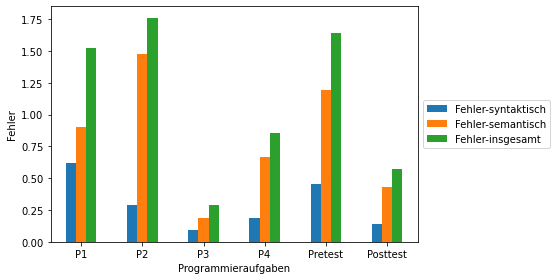

In [83]:
bar_df = pd.DataFrame([],columns=["Programmieraufgaben", "Fehler-syntaktisch", "Fehler-semantisch", "Fehler-insgesamt"])

count = len(unique_codes)


task_errors_pre = 0
tasks_errors_pre = 0
tasks_errors_syntax_pre = 0
tasks_errors_semantik_pre = 0
time_pre = 0

task_errors_post = 0
tasks_errors_post = 0
tasks_errors_syntax_post = 0
tasks_errors_semantik_post = 0
time_post = 0

#zeit std
pre_list = []
post_list = []

pre_list.extend(df_pre.loc[df_pre["Algorithmus"]=="Kürzestes Wort"]["Zeit"])
post_list.extend(df_post.loc[df_post["Algorithmus"]=="Maximales Produkt"]["Zeit"])
import statistics
print("STD", statistics.stdev(pre_list))
print("STD", statistics.stdev(post_list))

print(algo_names_pre)

time_pre = float(df_pre.loc[df_pre["Algorithmus"]=="Kürzestes Wort"]["Zeit"].mean())    
time_post = float(df_post.loc[df_post["Algorithmus"]=="Maximales Produkt"]["Zeit"].mean())

#time_post_quick = df_post.loc[df_post["Algorithmus"]=="Maximales Produkt"]["Zeit"].describe()

#std 41 
# 28 sek

#std 7min 41sek

sec_pre = time_pre%60 
sec_post = time_post%60

m_pre, s_pre = divmod(time_pre, 60)
m_post, s_post = divmod(time_post, 60)



     
df_pre.dropna(axis='columns')

p1_sy = []
p1_se = []
p1_error = []
p2_sy = []
p2_se = []
p2_error = []

pre_error_list = []

p3_sy = []
p3_se = []
p3_error = []
p4_sy = []
p4_se = []
p4_error = []

post_error_list = []


for i in range(len(algo_names_pre)):    
    task_errors_syntax_pre = float(df_pre.loc[df_pre["Algorithmus"] == algo_names_pre[i]]["syntaktische Fehler"].mean()) 
    task_errors_semantik_pre = float(df_pre.loc[df_pre["Algorithmus"] == algo_names_pre[i]]["semantische Fehler"].mean())
    
    task_error = task_errors_syntax_pre + task_errors_semantik_pre
    
    
    
    if i == 0:
        p1_sy.extend(df_pre.loc[df_pre["Algorithmus"] == algo_names_pre[0]]["syntaktische Fehler"])
        p1_se.extend(df_pre.loc[df_pre["Algorithmus"]==algo_names_pre[0]]["semantische Fehler"])
        
    if i == 1:
        p2_sy.extend(df_pre.loc[df_pre["Algorithmus"] == algo_names_pre[1]]["syntaktische Fehler"])
        p2_se.extend(df_pre.loc[df_pre["Algorithmus"]== algo_names_pre[1]]["semantische Fehler"])


    
    tasks_errors_syntax_pre += task_errors_syntax_pre
    tasks_errors_semantik_pre += task_errors_semantik_pre
    tasks_errors_pre += task_error
    
        
    bar_df = bar_df.append(pd.DataFrame([["P" + str(i+1), task_errors_syntax_pre, task_errors_semantik_pre, task_error]], columns=["Programmieraufgaben", "Fehler-syntaktisch", 
                                                                                      "Fehler-semantisch", "Fehler-insgesamt"]))

    
p1_error = [sum(x) for x in zip(p1_sy, p1_se)]
p2_error = [sum(x) for x in zip(p2_sy, p2_se)]


print("P1", statistics.stdev(p1_error))
print("P2", statistics.stdev(p2_error))

pre_error = [sum(x) for x in zip(p1_error, p2_error)]
print("Pre" ,statistics.stdev(pre_error))

for i in range(len(algo_names_post)):
    task_errors_syntax_post = float(df_post.loc[df_post["Algorithmus"] == algo_names_post[i]]["syntaktische Fehler"].mean()) 
    task_errors_semantik_post = float(df_post.loc[df_post["Algorithmus"] == algo_names_post[i]]["semantische Fehler"].mean())
    
    task_error = task_errors_syntax_post + task_errors_semantik_post
    
    #print("P" + str(i+3), task_errors_syntax_post, task_errors_semantik_post, task_error)

    if i == 0:
        p3_sy.extend(df_post.loc[df_post["Algorithmus"] == algo_names_post[0]]["syntaktische Fehler"])
        p3_se.extend(df_post.loc[df_post["Algorithmus"]==algo_names_post[0]]["semantische Fehler"])
        
    if i == 1:
        p4_sy.extend(df_post.loc[df_post["Algorithmus"] == algo_names_post[1]]["syntaktische Fehler"])
        p4_se.extend(df_post.loc[df_post["Algorithmus"]== algo_names_post[1]]["semantische Fehler"])
        
    
    tasks_errors_syntax_post += task_errors_syntax_post
    tasks_errors_semantik_post += task_errors_semantik_post
    tasks_errors_post += task_error
    
    
    bar_df = bar_df.append(pd.DataFrame([["P" + str(i+3), task_errors_syntax_post, task_errors_semantik_post, task_error]], columns=["Programmieraufgaben", "Fehler-syntaktisch", 
                                                                                      "Fehler-semantisch", "Fehler-insgesamt"]))

p3_error = [sum(x) for x in zip(p3_sy, p3_se)]
p4_error = [sum(x) for x in zip(p4_sy, p4_se)]


print("P3", statistics.stdev(p3_error))
print("P4", statistics.stdev(p4_error))

post_error = [sum(x) for x in zip(p3_error, p4_error)]
print("Post" ,statistics.stdev(post_error))

    
bar_df = bar_df.append(pd.DataFrame([["Pretest", tasks_errors_syntax_pre/2, tasks_errors_semantik_pre/2, tasks_errors_pre/2]], columns=["Programmieraufgaben", "Fehler-syntaktisch", "Fehler-semantisch", "Fehler-insgesamt"]))
bar_df = bar_df.append(pd.DataFrame([["Posttest", tasks_errors_syntax_post/2, tasks_errors_semantik_post/2, tasks_errors_post/2]], columns=["Programmieraufgaben", "Fehler-syntaktisch", "Fehler-semantisch", "Fehler-insgesamt"]))

print("PRE", tasks_errors_syntax_pre, tasks_errors_semantik_pre, tasks_errors_pre)
print("POST", tasks_errors_syntax_post, tasks_errors_semantik_post, tasks_errors_post)

print(tasks_errors_syntax_pre + tasks_errors_semantik_pre)
fehler = "Aufgabe falsch verstanden"
liste = []

                       
bar_df = bar_df.set_index('Programmieraufgaben')
ax = bar_df.plot.bar(ylabel='Fehler', rot=0)
plt.tight_layout()
ax.yaxis.set_ticks(np.arange(0, 2.0, 0.25))
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/behavioral/programmieraufgaben_fehler.pdf", bbox_inches='tight', pad_inches=0.01)

Pre 48.0 17.190476190476147
Post 18.0 36.71428571428578


AttributeError: 'AxesSubplot' object has no attribute 'setx_label'

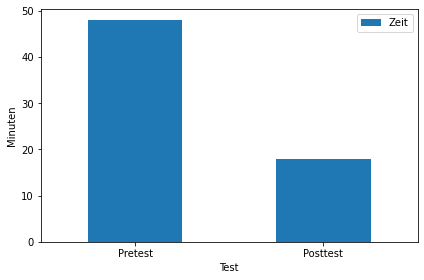

In [64]:
bar_df = pd.DataFrame([],columns=["Test", "Zeit"])

print("Pre", m_pre, s_pre)
print("Post", m_post, s_post)


time_pre = m_pre + (s_pre/60)
time_post = m_post + (s_post/60)

bar_df = bar_df.append(pd.DataFrame([["Pretest", m_pre]], columns=["Test", "Zeit"]))
bar_df = bar_df.append(pd.DataFrame([["Posttest", m_post]], columns=["Test", "Zeit"]))


                       
bar_df = bar_df.set_index('Test')
ax = bar_df.plot.bar(ylabel='Minuten', rot=0)
plt.tight_layout()
ax.setx_label("")
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/behavioral/programmieraufgaben_zeit.pdf", bbox_inches='tight', pad_inches=0.01)

In [ ]:
programming_tasks_pre = df_pre["Algorithmus"].unique()
programming_tasks_post = df_post["Algorithmus"].unique()

programming_tasks_pre_time = df_pre[df_pre["Algorithmus"]=="Kürzestes Wort"]["Zeit"]
programming_tasks_post_time = df_post[df_post["Algorithmus"]=="Maximales Produkt"]["Zeit"]

programming_tasks_pre_error_1_syntax = df_pre[df_pre["Algorithmus"]=="Kürzestes Wort"]["syntaktische Fehler"]
programming_tasks_pre_error_1_syntax = df_pre[df_pre["Algorithmus"]=="Kürzestes Wort"]["syntaktische Fehler"]

programming_tasks_pre_error_2_syntax = df_pre[df_pre["Algorithmus"]=="Ungerade Anzahl"]["syntaktische Fehler"]

programming_tasks_post_error_1 = df_post[df_post["Algorithmus"]=="Maximales Produkt"]["syntaktische Fehler"]
programming_tasks_post_error_2 = df_post[df_post["Algorithmus"]=="String Wiederholung"]["syntaktische Fehler"]

programming_tasks_pre_error = programming_tasks_pre_error_1.append(programming_tasks_pre_error_2)
programming_tasks_post_error = programming_tasks_post_error_1.append(programming_tasks_post_error_2)

#print(programming_tasks_time)
#shapiro <.05 - Ablehnung

wilcoxon_time = wilcoxon(programming_tasks_pre_time, programming_tasks_post_time)

wilcoxon_correctness_1 = wilcoxon(programming_tasks_pre_error_1, programming_tasks_post_error_2)
wilcoxon_correctness_2 = wilcoxon(programming_tasks_pre_error_2, programming_tasks_post_error_1)
wilcoxon_correctness_all = wilcoxon(programming_tasks_pre_error, programming_tasks_post_error)

cliffs_delta_time = cliffs_delta(programming_tasks_pre_time, programming_tasks_post_time)

cliffs_delta_correctness_1 = cliffs_delta(programming_tasks_pre_error_1, programming_tasks_post_error_2)
cliffs_delta_correctness_2 = cliffs_delta(programming_tasks_pre_error_2, programming_tasks_post_error_1)
cliffs_delta_correctness_all = cliffs_delta(programming_tasks_pre_error, programming_tasks_post_error)


In [ ]:
from pingouin import wilcoxon
from cliffs_delta import cliffs_delta
import scipy.stats as stats

#display(df_pre)


response_time_pre = df_pre["Zeit"].dropna().tolist()
response_time_post = df_post["Zeit"].dropna().tolist()

syntax_pre = df_pre["syntaktische Fehler"].dropna().tolist()
semantik_pre = df_pre["semantische Fehler"].dropna().tolist()


syntax_post = df_post["syntaktische Fehler"].dropna().tolist()
semantik_post = df_post["semantische Fehler"].dropna().tolist()


error_pre = [a + b for a, b in zip(syntax_pre, semantik_pre)]
error_post = [a + b for a, b in zip(syntax_post, semantik_post)]

print(error_pre)


print(error_pre)

print(stats.shapiro(response_time_pre))
print(stats.shapiro(response_time_post))



print("ZEIT")
print(cliffs_delta(response_time_pre, response_time_post))
print(wilcoxon(response_time_pre, response_time_post))


print("FEHLER")
print(cliffs_delta(error_pre, error_post))
print(wilcoxon(error_pre, error_post))

#for i in range(len(post_list_same)):
#    tmp_pre_response_time = df_pre[df_pre["Algorithm"]==pre_list_different[i]]["ResponseTime"]
#    tmp_post_response_time = df_post[df_post["Algorithm"]==]["ResponseTime"]
#    
#    cliffs_delta_correctness_different.append([post_list_different[i], cliffs_delta(tmp_pre_correctness, tmp_post_correctness)[0]])
#    cliffs_delta_response_time_different.append([post_list_different[i], cliffs_delta(tmp_pre_response_time, tmp_post_response_time)[0]])


In [7]:
correctness_cliffs = cliffs_delta(error_pre, error_post)
correctness_wilco = wilcoxon(error_pre, error_post)


def Average(lst):
    return sum(lst) / (len(lst)/2)
  
# Driver Code
error_pre_average = Average(error_pre)
error_post_average = Average(error_post)

print(error_post_average)
print(error_pre_average)

print(error_pre_average)

print(correctness_cliffs[0])

programming_tasks_correctness_df = pd.DataFrame([
                          ["P1-P2/P3-P4", round(error_pre_average, 2), round(error_post_average, 2),
                           (round(correctness_wilco["p-val"][0], 2)), round(correctness_cliffs[0], 2)]],
                        columns=['Programmieraufgabe', 'Pretest', 'Posttest' , 'Wilcoxon', 'Cliffs-Delta'])


display(programming_tasks_correctness_df)

import os

with open(
    os.path.join(os.getcwd(),"programming_tasks_correctness.tex"), "w"
) as tf:
    tf.write(programming_tasks_correctness_df
             .to_latex(
             index=False,
             caption="Programmieraufgaben: Korrrektheit",
                 label="tab:table_label",
                 escape=False,
                 column_format="cccccc",
             ))

NameError: name 'cliffs_delta' is not defined

NameError: name 'programming_tasks_pre_error_1' is not defined

In [90]:
programming_tasks_pre_error_1_syntax = df_pre[df_pre["Algorithmus"]=="Kürzestes Wort"]["syntaktische Fehler"]
programming_tasks_pre_error_1_semantic = df_pre[df_pre["Algorithmus"]=="Kürzestes Wort"]["semantische Fehler"]

programming_tasks_pre_error_2_syntax = df_pre[df_pre["Algorithmus"]=="Ungerade Anzahl"]["syntaktische Fehler"]
programming_tasks_pre_error_2_semantic = df_pre[df_pre["Algorithmus"]=="Ungerade Anzahl"]["semantische Fehler"]


p3_syntax = df_post[df_post["Algorithmus"]=="Maximales Produkt"]["syntaktische Fehler"]
p3_semantic = df_post[df_post["Algorithmus"]=="Maximales Produkt"]["semantische Fehler"]

p4_syntax = df_post[df_post["Algorithmus"]=="String Wiederholung"]["syntaktische Fehler"]
p4_semantic = df_post[df_post["Algorithmus"]=="String Wiederholung"]["semantische Fehler"]


pre_time = df_pre[df_pre["Algorithmus"]=="Kürzestes Wort"]["Zeit"]
post_time = df_post[df_post["Algorithmus"]=="Maximales Produkt"]["Zeit"]

pre_time = pre_time.tolist()
post_time = post_time.tolist()




list1_sy = programming_tasks_pre_error_1_syntax.tolist()
list1_se = programming_tasks_pre_error_1_semantic.tolist()

list2_sy = programming_tasks_pre_error_2_syntax.tolist()
list2_se = programming_tasks_pre_error_2_semantic.tolist()

p3_sy = p3_syntax.tolist()
p3_se = p3_semantic.tolist()

p4_sy = p4_syntax.tolist()
p4_se = p4_semantic.tolist()

print(list1_sy)
print(list1_se)
print(list2_sy)
print(list2_se)

pre_error = [sum(x) for x in zip(list1_sy, list1_se, list2_sy, list2_se)]
post_error = [sum(x) for x in zip(p3_sy, p3_se, p4_sy, p4_se)]
    

pre_box = pd.DataFrame(pre_error, columns=["Fehler"])
pre_box["Test"] = "Pretest"


post_box = pd.DataFrame(post_error, columns=["Fehler"])
post_box["Test"] = "Posttest"


error = [pre_box, post_box]

pre_time_1 = []
post_time_1 = []

for p in pre_time:
    m_pre, s_pre = divmod(p, 60)
    
    if s_pre >= 30:
        m_pre += 1
    pre_time_1.append(m_pre)
    
    
for p in post_time: 
    m_post, s_post = divmod(p, 60)
    
    if s_post >= 30:
        m_post += 1
    post_time_1.append(m_post)
    
#m_post, s_post = divmod(time_post, 60)

pre_time_box = pd.DataFrame(pre_time_1, columns=["Beantwortungszeit"])
post_time_box = pd.DataFrame(post_time_1, columns=["Beantwortungszeit"])


print(pre_time_1)
print(statistics.median(pre_time_1))
print(statistics.median(post_time_1))
print(statistics.median(pre_error))

print(statistics.median(post_error))

pre_time_box["Test"] = "Pretest"
post_time_box["Test"] = "Posttest"

time = [pre_time_box, post_time_box]

programming_tasks_error_plot = pd.concat(error)
programming_tasks_time_plot = pd.concat(time)

[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 3, 1, 1, 0]
[1, 2, 0, 0, 1, 5, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 3, 1]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0]
[5, 5, 0, 1, 0, 4, 1, 0, 2, 1, 0, 0, 1, 5, 1, 0, 1, 1, 0, 2, 1]
[148.0, 7.0, 49.0, 53.0, 12.0, 37.0, 162.0, 66.0, 73.0, 54.0, 28.0, 40.0, 40.0, 66.0, 62.0, 2.0, 35.0, 1.0, 25.0, 13.0, 41.0]
40.0
17.0
2
1


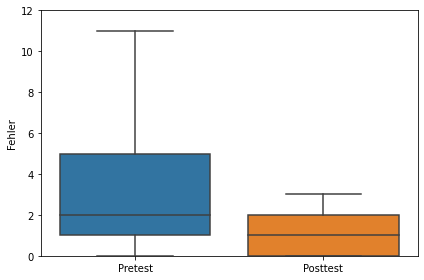

In [62]:
ax = sns.boxplot(x="Test", y="Fehler", data=programming_tasks_error_plot)
ax.set_xticklabels(ax.get_xticklabels())
plt.ylim(0, 12)

ax.set_xlabel("")


plt.tight_layout()
plt.savefig("results/behavioral/p_fehler_boxplot.pdf", bbox_inches='tight', pad_inches=0.01)

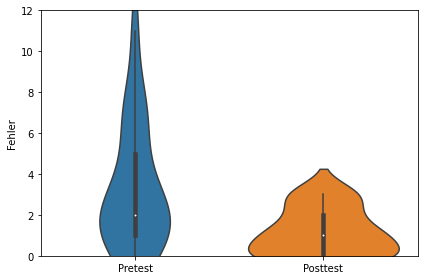

In [61]:
ax = sns.violinplot(x="Test", y="Fehler", data=programming_tasks_error_plot)
ax.set_xticklabels(ax.get_xticklabels())
plt.ylim(0, 12)

ax.set_xlabel("")

plt.tight_layout()
plt.savefig("results/behavioral/p_fehler_violinplot.pdf", bbox_inches='tight', pad_inches=0.01)

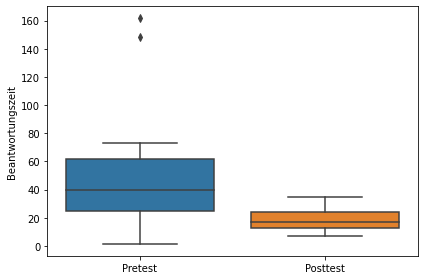

In [60]:
ax = sns.boxplot(x="Test", y="Beantwortungszeit", data=programming_tasks_time_plot)
ax.set_xticklabels(ax.get_xticklabels())

ax.set_xlabel("")

plt.tight_layout()
plt.savefig("results/behavioral/p_zeit_boxplot.pdf", bbox_inches='tight', pad_inches=0.01)

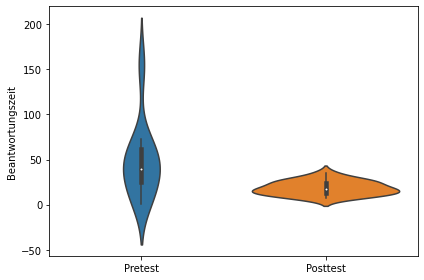

In [59]:
ax = sns.violinplot(x="Test", y="Beantwortungszeit", data=programming_tasks_time_plot)
ax.set_xticklabels(ax.get_xticklabels())

ax.set_xlabel("")
plt.tight_layout()
plt.savefig("results/behavioral/p_zeit_violinplot.pdf", bbox_inches='tight', pad_inches=0.01)

In [58]:
from researchpy import ttest

print(pre_error)
print(post_error)

d = {'Pretest': pre_error, 'Posttest': post_error}

#print("MEDIAN", np.median(correctness_same_list_pre))
#print("MEDIAN", np.median(correctness_same_list_post))

print("MEDIAN", np.median(pre_error))
print("MEDIAN", np.median(post_error))
test_df = pd.DataFrame(data=d)



tmp_tt = ttest(test_df["Pretest"], test_df["Posttest"], equal_variances=False, paired=True)

print(tmp_tt)

[6, 8, 1, 1, 2, 11, 2, 0, 3, 2, 1, 4, 2, 5, 1, 0, 1, 7, 3, 7, 2]
[3, 3, 0, 3, 1, 2, 0, 1, 1, 1, 0, 0, 2, 3, 0, 0, 1, 2, 0, 1, 0]
MEDIAN 2.0
MEDIAN 1.0
  Wilcoxon signed-rank test    results
0       Mean for Pretest =    3.285714
1      Mean for Posttest =    1.142857
2                W value =   12.500000
3                Z value =   -3.179200
4      Two sided p value =    0.001500
5                      r =   -0.490600


C:\Users\Dominik\anaconda3\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
